# 신약개발과 머신러닝

- 신약개발 프로세스

1. 타겟 발굴: 병의 원인이 되는 단백질이나 유전자와 같은 바이오 분자를 찾는 과정

2. 후보물질 탐색: 타겟에 대한 치료 효과를 가진 화합물을 찾는 과정

3. 리드 최적화: 후보물질의 효능, 안정성, 투여 방법 등을 개선하는 과정

4. 전임상실험: 동물 모델을 통해 치료 효과와 안정성을 평가하는 데 사용되는 실험

5. 임상실험: 인체 대상 임상 시험을 통해 효능과 안전성을 평가하는 과정

- 머신러닝(AI) 모델을 이용하여 신약개발 프로세스 시간과 비용을 단축하고, 더 넓은 범위의 후보물질 탐색 가능

<img src="http://www.jw-holdings.co.kr/admin/media/ckeditor/multiupload/6de6c360-2c11-4dec-9efd-4b8afbcb0460.jpg" width=700>

# 머신러닝 이해

- 회귀 예측, 분류 예측, 최적의 추천 등을 수행하는 소프트웨어로, 데이터를 보고 학습하며 다량의, 다양한 데이터로 학습시킬수록 점차 성능이 개선되는 방식으로 구현된다
- 현재 인공지능을 구현하는 대표적인 방법이 머신러닝 기법이다
 - "Machine Learning"이란 컴퓨터가 데이터를 보고 스스로 학습한다는 의미이다
 - 예전에는 인공지능을 구현하기 위해서 "생각하는" 컴퓨터를 만들거나, 사람의 지식을 알고리즘이나 데이터로 구축하는 방법을 시도하였으나 성공하지 못했다

## 머신러닝 구현 방법

- 입력 데이터(X)를 보고 원하는 출력(y)을 얻는 방식으로 동작하며 예측 오차를 줄이도록 학습을 시킨다  

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.38.png?raw=1" align='left'>

### 데이터 (X)
- 훈련 (train) 데이터: 모델을 학습시키는데 사용하는 데이터
- 검증 (validation) 데이터: 학습시킨 모델의 동작을 검증하는데 사용하는 데이터
- 학습에 사용하는 데이터가 많을수록 예측, 추천 성능이 향상된다
 - 데이터 타입: 정형 데이터(테이블 데이터), 비정형 데이터(이미지, 텍스트, 센서 데이터 등)
- 머신러닝 모델의 성능을 높이기 위해서는 원시(raw) 데이터로부터 적절한 학습 및 검증 데이터를 만드는 **데이터 전처리**가 반드시 필요하다

### 머신러닝 모델
- 입력 데이터(X)로부터 최적의 출력(y)을 얻는 소프트웨어
- 최적의 출력이란 정답(label, target)을 잘 예측하는 것을 말한다
 - 최적의 출력을 얻기 위해서 모델을 구성하는 파라미터의 최적치를 찾는다(예: 선형 회귀에서 가중치 값)
- 모델의 종류: 선형모델, 로지스틱 회귀, SVM, 결정트리, 랜덤 포레스트, kNN, 베이시언, 딥러닝 모델 (MLP, CNN, RNN, GCN, Transformer 등)

### 목적
- 머신러닝의 목적은 다음 중 하나이다
 - 예측(predictive) 분석
> 회귀 예측(regression): 수치를 예측  
> 분류 예측(classification): 카테고리를 예측
 - 설명(descriptive)적 분석
 - 군집화(clustering)
 - 추천(recommendation)

### 성능평가 (performance measure)
- 모델이 원하는 동작을 잘 수행하는지를 평가하는 값으로, 주요 평가 척도는 다음과 같다
 - 회귀모델에서는 R-squared를 사용
 - 분류 모델에서는 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수, ROC-AUC 등을 사용

### 최적화기 (optimizer)
- 학습을 통하여 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 최적화 알고리즘으로는 경사하강법(GD: gradient descent)이 기본적으로 사용된다

### 손실함수 (loss function)
- 최적화기는 손실함수를 최소화 하는 방향으로 동작한다
- 즉, 손실함수는 최적화기의 동작이 잘 이루어지고 있는지를 모니터링하는 값이다
- 손실함수로, 회귀 모델에서는 MSE(mean square error)를, 분류에서는 크로스 엔트로피(cross entrophy)를 주로 사용한다


# import

In [1]:
!pip install deepchem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")
%matplotlib inline

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole     # 화면에 출력하기 위한 옵션
IPythonConsole.ipython_useSVG=True

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# 데이터

- 소분자 유기화합물의 lipophilicity 용해도 사용

- **Lipophilicity** 는 화합물이 lipids, oils 등 비극성 용매에 용해되는 물리적 특성을 나타낸다

In [3]:
# 데이터 다운로드 (컬럼명을 'smiles'와 'logP'로 지정)
logP_data = pd.read_csv('https://raw.githubusercontent.com/StillWork/data/master/logP_dataset.csv',
            names=['smiles', 'logP'])

# # csv 파일로 저장
# logP_data.to_csv('logP.csv')

# 내용 보기
print(logP_data.shape)
logP_data[:3]

(14610, 2)


,smiles,logP
0,C[C@H]([C@@H](C)Cl)Cl,2.3
1,C(C=CBr)N,0.3
2,CCC(CO)Br,1.3


<Axes: >

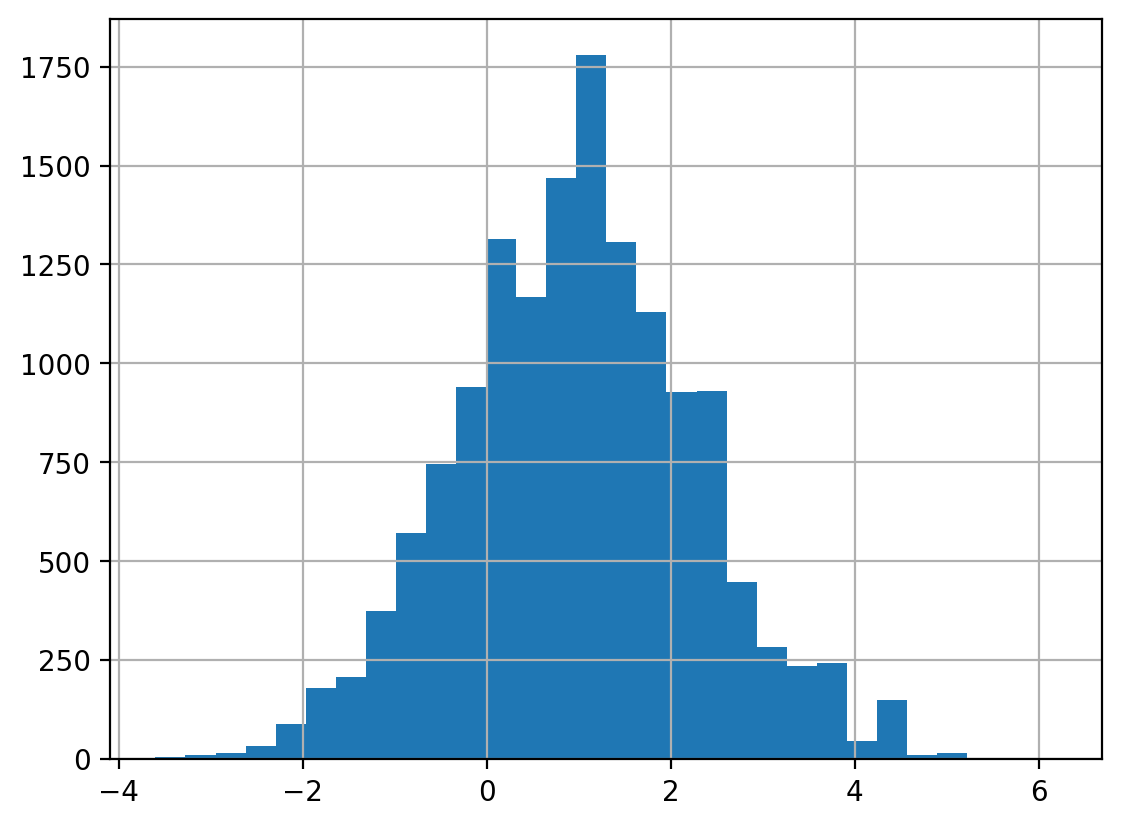

In [4]:
# 목적 변수 분포
logP_data.logP.hist(bins=30)


- Chem.MolFromSmiles() 함수를 이용하여 SMILES로부터 Mol 객체를 얻는다

In [5]:
# 사본 데이터프레임 사용
df = logP_data.copy()
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

# 리스트를 생성하는 다른 방법
# df['mol'] = [Chem.MolFromSmiles(x) for x in df['smiles']]
print(type(df['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


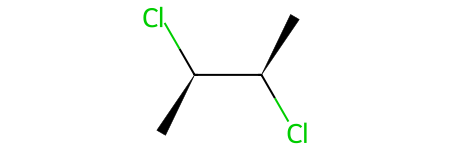

In [6]:
df.mol[0]

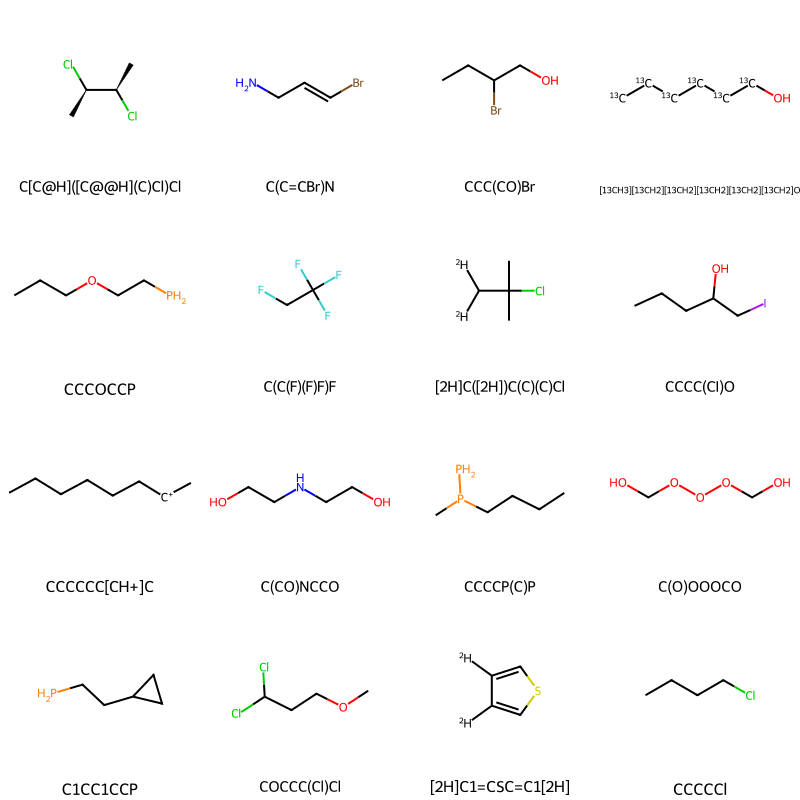

In [7]:
# 16개 이미지를 그리드 형태로 그리기
mols = df['mol'][:16]
Draw.MolsToGridImage(mols, molsPerRow=4, useSVG=True, legends=list(df['smiles'][:16].values))

### 특성 추가하기

- Chem 모듈에서 분자의 다양한 속성 정보를 추출하는 함수를 제공한다
- mol 객체로부터 분자를 구성하는 원자수를 얻으려면 다음과 같은, mol 객체가 제공하는 함수를 사용하면 된다
 - GetNumAtoms(): 모든 원자 수 얻기
 - GetNumHeavyAtoms(): 수소를 제외한 원자의 수 얻기


In [8]:
# AddHs() mol 객체에 수소 원자를 추가로 표시한다

df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
df[:3]

,smiles,logP,mol,num_of_atoms,num_of_heavy_atoms
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7a9e93b446d0>,14,6
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7a9e93b44740>,11,5
2,CCC(CO)Br,1.3,<rdkit.Chem.rdchem.Mol object at 0x7a9e93b447b0>,15,6


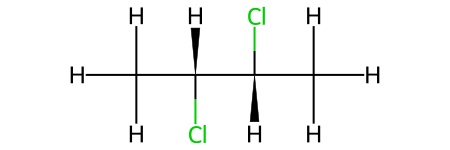

In [9]:
df.mol[0]

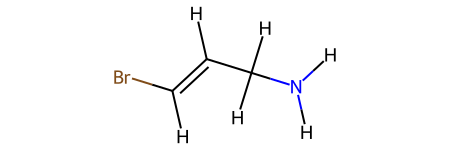

In [10]:
df.mol[1]

- 분자를 구성하는 각 원자별 갯수를 추가하기
- GetSubstructMatches()를 사용하면 분자 내에 특정한 패턴이 들어있는지를 찾아낼 수 있다

In [11]:
# 탄소 패턴을 지정한다
c_patt = Chem.MolFromSmiles('C')

# 이 패턴이 들어있는 곳을 찾는다. 패턴의 수를 세면 탄소 원자가 몇개 들어있는지 알 수 있다
print(df['mol'][0].GetSubstructMatches(c_patt))

((0,), (1,), (2,), (3,))


In [12]:
# 임의의 패턴(원자)를 몇개 포함하고 있는지를 얻는 함수
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl'], df)

In [13]:
df[:3]

,smiles,logP,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7a9e93b446d0>,14,6,4,0,0,2
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7a9e93b44740>,11,5,3,0,1,0
2,CCC(CO)Br,1.3,<rdkit.Chem.rdchem.Mol object at 0x7a9e93b447b0>,15,6,4,1,0,0


# 회귀 모델
- 위에서 구한 분자의 여러 특성을 사용하여 용해도를 예측하는 회귀 모델을 만든다

## 훈련/검증 데이터 나누기

In [14]:
# 특성 컬럼을 선택하여 X를 만들고 목적변수를 정의한다
train_df = df.drop(columns=['smiles', 'mol', 'logP'])
y = df['logP'].values

print(train_df.columns)

# 훈련과 검증 데이터를 나눈다 (검증 데이터로 10% 할당)
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.1)


Index(['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms',
       'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms'],
      dtype='object')


- 아래는 훈련과 검증 데이터를 나누는 개념도이다. 주어진 데이터 순서를 유지하면서 데이터를 나누려면 shuffle=False 옵션을 지정하면 된다 (디폴트 값은 랜덤하게 섞는다)

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

## 회귀 모델 성능 평가
- 회귀 모델의 성능을 평가하는 척도로 기본적으로 R-Squared를 사용하며 MAE, RMSE 등을 참고로 본다
 - MAE: mean absolute error  
 - MSE: mean squared error    
 - RMSE: root MSE  

$MAE = $$1\over{N}$$ \sum |y_{i} - \hat{y}|$

$MSE = $$1\over{N}$$ \sum (y_{i} - \hat{y})^{2}$

$RMSE = \sqrt{MSE}$

$R^{2} = 1$-$\sum(y_{i}-\hat{y})^{2}\over{\sum(y_{i}-\bar{y})^{2}}$ $= 1$-$MSE\over{Variance}$  
 >  $y$ :  실제값, $\hat{y}$ :  예측치, $\bar{y}$ :  평균치

-  R-Squared
 - 회귀 성능의 기본적인 평가 지표
 - MSE를 분산으로 정규화한 값을 사용한다
 - R-sqaured 값은 1에 가까울수록 완벽한 예측을 수행한 것이고, 0 근처이면 오차 평균치가 표준편차 정도인 경우이다

- 회귀 모델의 여러 성능 평가 지표를 보는 함수 정의

In [15]:
def show_reg_result(y_test, y_pred, N=50):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    R2 = r2_score(y_test, y_pred)
    max_err = np.abs(y_test - y_pred).max()

    print('R2:', round(R2,4))
    print('MAE:', round(mae, 4))
    print('RMSE:', round(rmse,4))
    print('Max error:', round(max_err, 4))

    # 일부 실제값과 예측값 샘플을 plot으로 비교하여 그려본다 (N 개)

    if N > 0:
      plt.figure(figsize=(8, 6))
      plt.plot(y_pred[:N], ".b-", label="prediction", linewidth=1.0)
      plt.plot(y_test[:N], '.r-', label="actual", linewidth=1.0)
      plt.legend()
      plt.ylabel('logP')
      plt.show()

## 선형모델

R2: 0.6577
MAE: 0.5842
RMSE: 0.7558
Max error: 3.7322


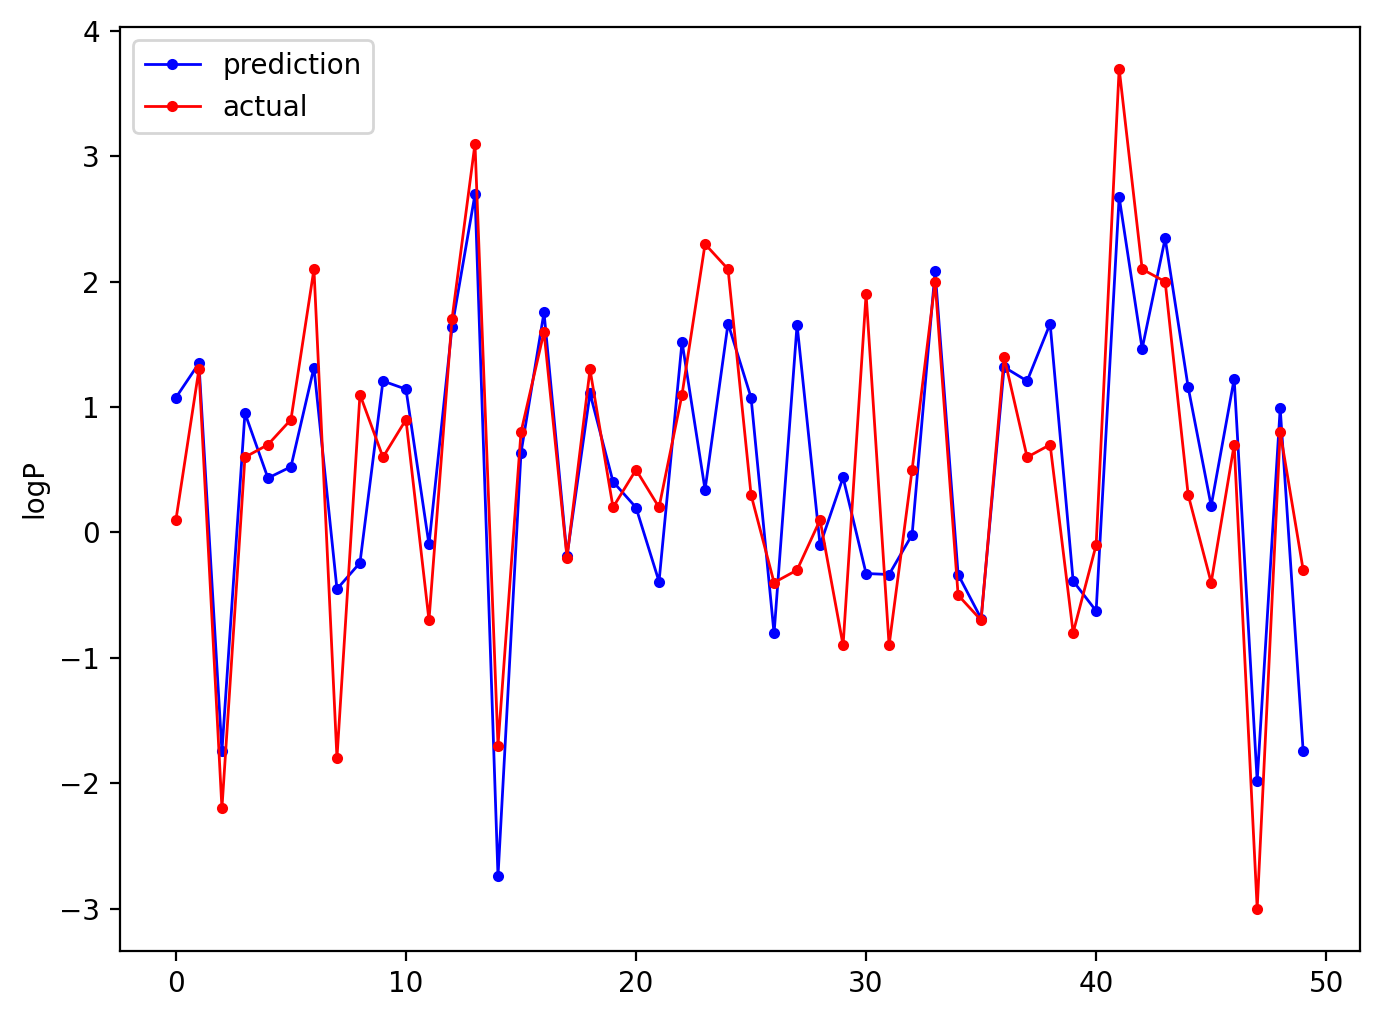

In [16]:
# 모델 학습 및 성능 평가
lin = LinearRegression() # y = ax + b
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test) # logP의 예측값
show_reg_result(y_test, y_pred)

# 특성 추가하기 -II

- [rdkit.Chem.Descriptors](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html)이 제공하는 함수들을 사용하면 다양한 분자특성들을 알 수 있다. 아래의 특성을 추가하겠다

 - TPSA() - the surface sum over all polar atoms or molecules also including their attached hydrogen atoms;
 - ExactMolWt() - 정확한 몰 중량
 - NumValenceElectrons() - number of valence electrons (may illustrate general electronic density)
 - NumHeteroatoms() - general number of non-carbon atoms

- 이외에도 분자의 링정보를 보거나, 원자별로 결합 정보를 볼 수 있다
 - GetRingInfo(), GetAtoms(), GetBonds() 등을 사용

In [17]:
df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

- 특성을 추가했을 때의 성능을 비교하겠다

In [18]:
train_df = df.drop(columns=['smiles', 'mol', 'logP'])
y = df['logP'].values

print(train_df.columns)
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.1, random_state=1)

Index(['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms',
       'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms', 'tpsa', 'mol_w',
       'num_valence_electrons', 'num_heteroatoms'],
      dtype='object')


In [19]:
X_train.shape

(13149, 10)

## 선형 모델

R2: 0.7907
MAE: 0.4625
RMSE: 0.5932
Max error: 2.2606


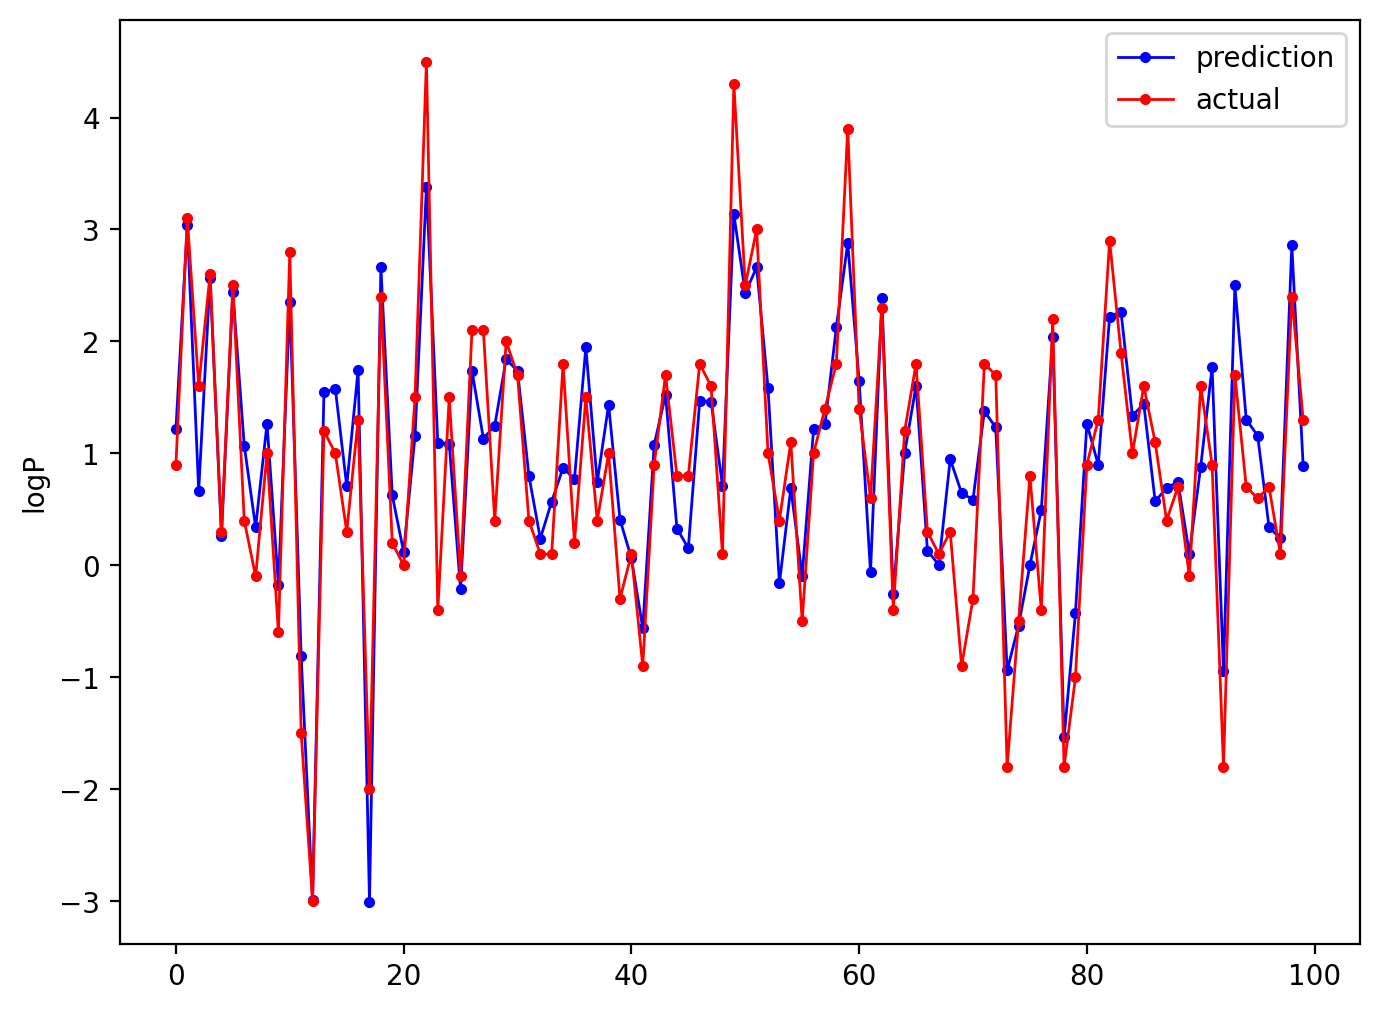

In [20]:
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
show_reg_result(y_test, y_pred,100)

In [21]:
# 선형 모델의 가중치 보기, a
lin.coef_

array([-0.29776277, -0.60021523,  0.15722981, -0.03826434,  0.12643248,
        0.07375684, -0.03395185,  0.00498247,  0.26900081, -0.75744504])

In [22]:
# 가중치를 그려보는 함수 정의

def plot_feature_weight(feature, weight):
    # plt.figure(figsize=(5,8)) # 특성수가 많은 경우 그림을 세로로 키운다
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

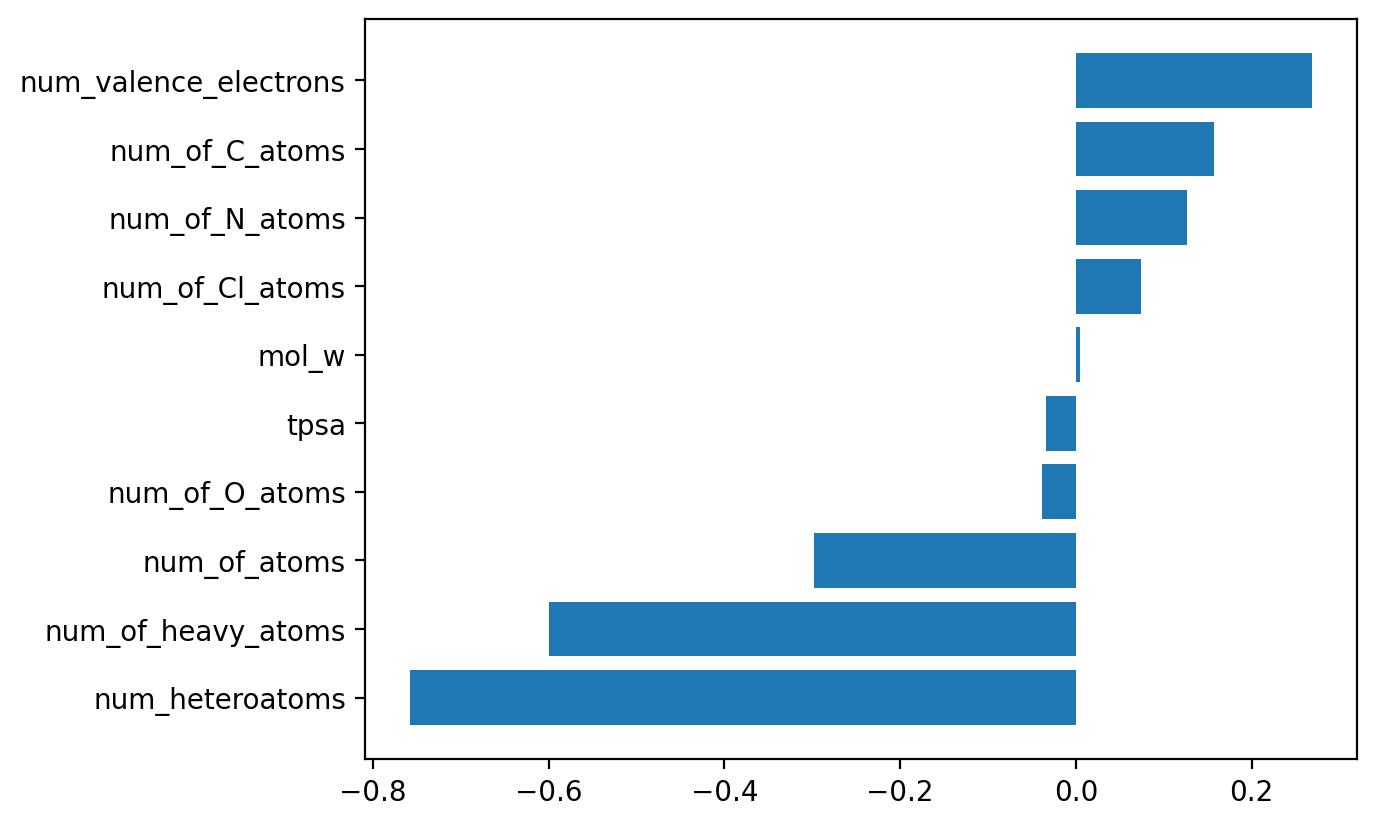

In [23]:
plot_feature_weight(train_df.columns, lin.coef_)

## 트리 모델
- 결정 트리, 랜덤포레스트

In [24]:
# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다

res = []
for depth in range(1,50,2):
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train, y_train)
    res.append((depth, dtr.score(X_test, y_test).round(4)))
res[:5]

[(1, 0.4255), (3, 0.6818), (5, 0.7664), (7, 0.8096), (9, 0.8361)]

In [25]:
df_res = pd.DataFrame(res, columns=['depth', 'score']).set_index('depth')
df_res[:5]

,score
depth,
1,0.4255
3,0.6818
5,0.7664
7,0.8096
9,0.8361


<Axes: xlabel='depth'>

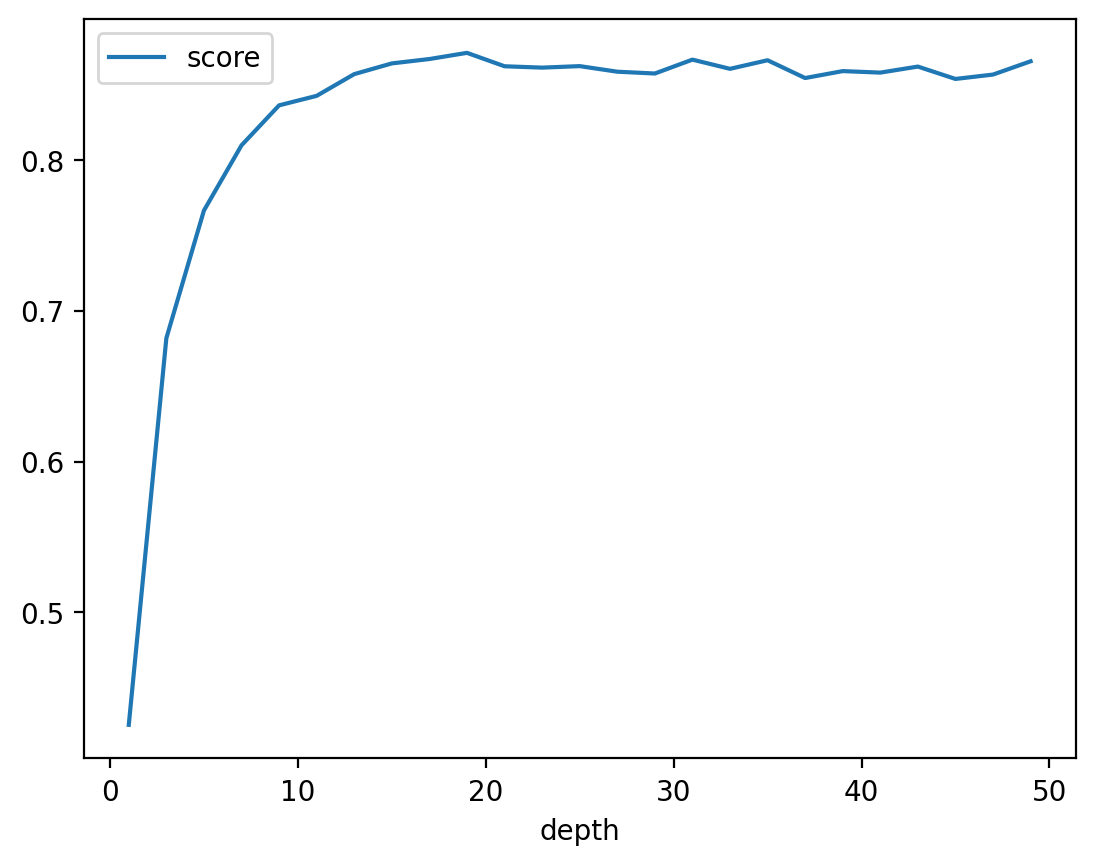

In [26]:
df_res.plot()

In [27]:
df_res.idxmax(), df_res.max()

(score    19
 dtype: int64,
 score    0.8709
 dtype: float64)

R2: 0.8646
MAE: 0.3347
RMSE: 0.4771
Max error: 2.5


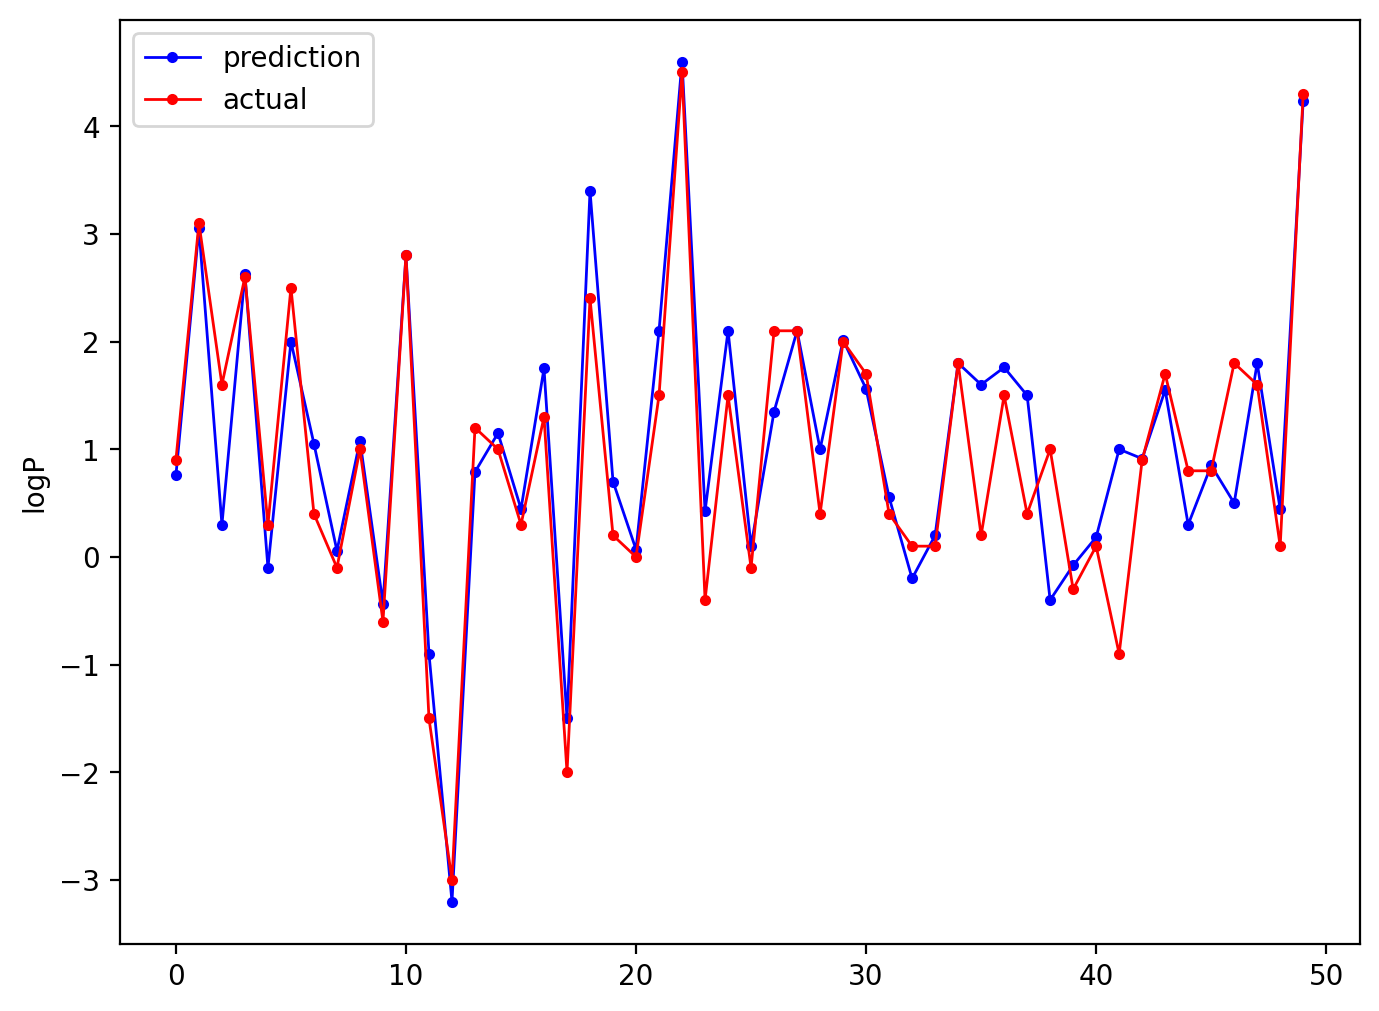

In [28]:
# 결정 트리 회귀 모델 성능 보기

dtr = DecisionTreeRegressor(max_depth=21)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test, y_pred)

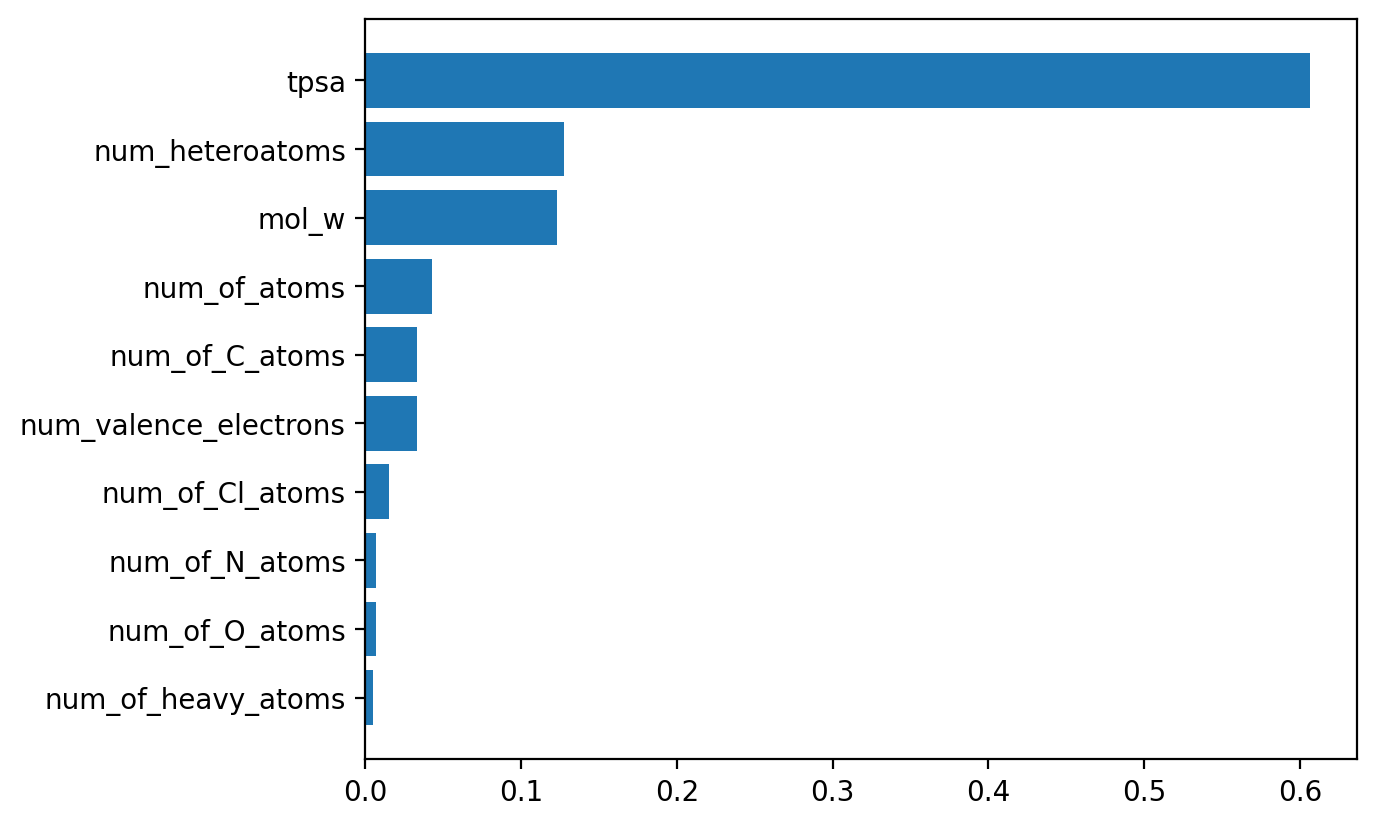

In [29]:
# 트리 모델이 제공하는 특성 중요도 (feature_importances_) 보기

plot_feature_weight(train_df.columns, dtr.feature_importances_)

## 랜덤 포레스트 모델

R2: 0.8946
MAE: 0.311
RMSE: 0.421
Max error: 1.9992


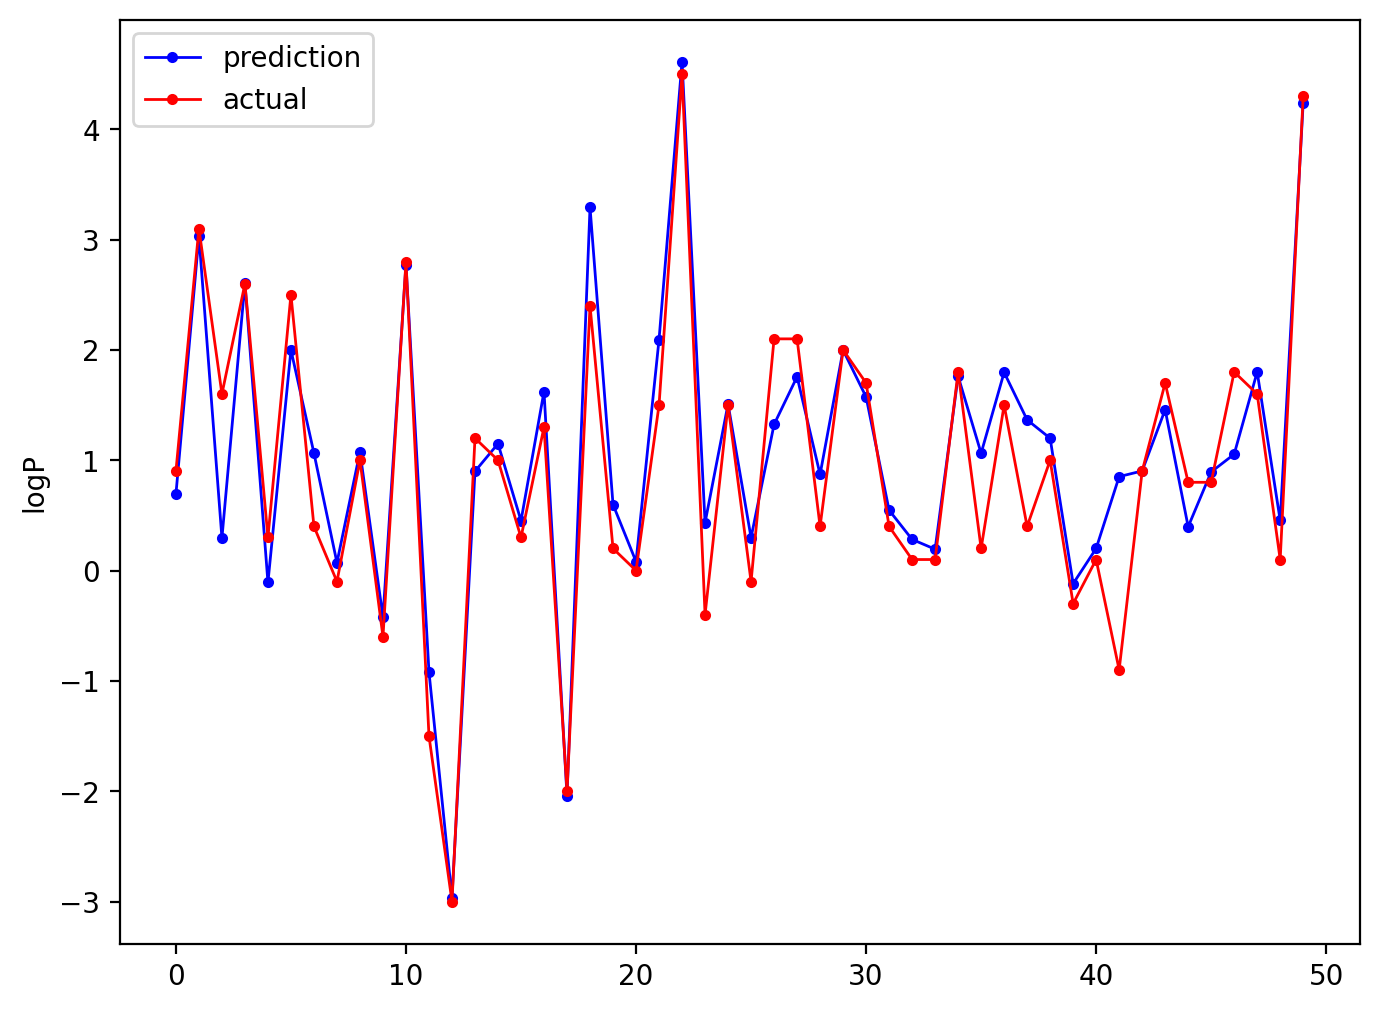

In [30]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test, y_pred)

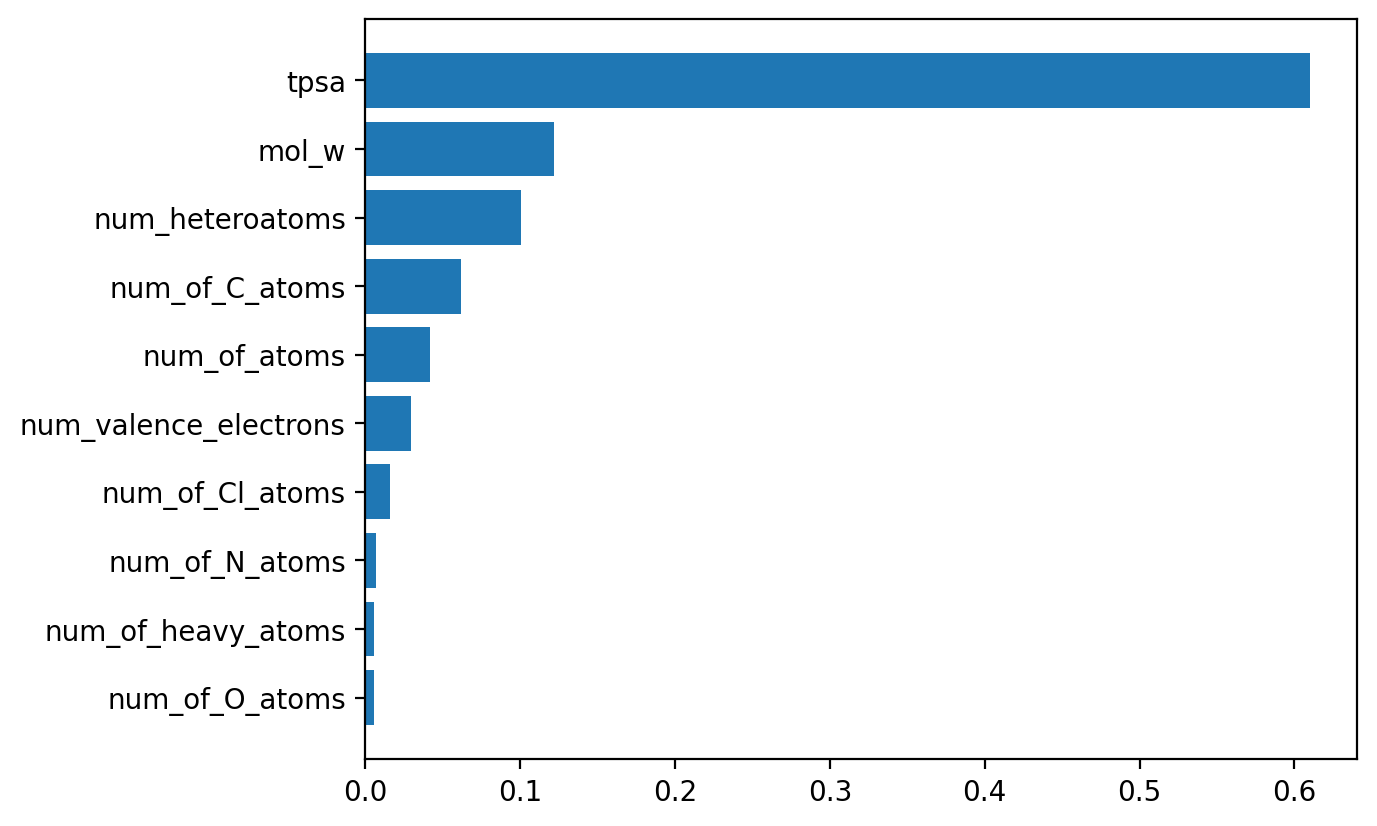

In [31]:
# 랜덤 포레스트 모델이 제공하는 특성 중요도 (feature_importances_) 보기

plot_feature_weight(train_df.columns, rfr.feature_importances_)

## 트리 그리기

- depth=3 까지만 그려보겠다

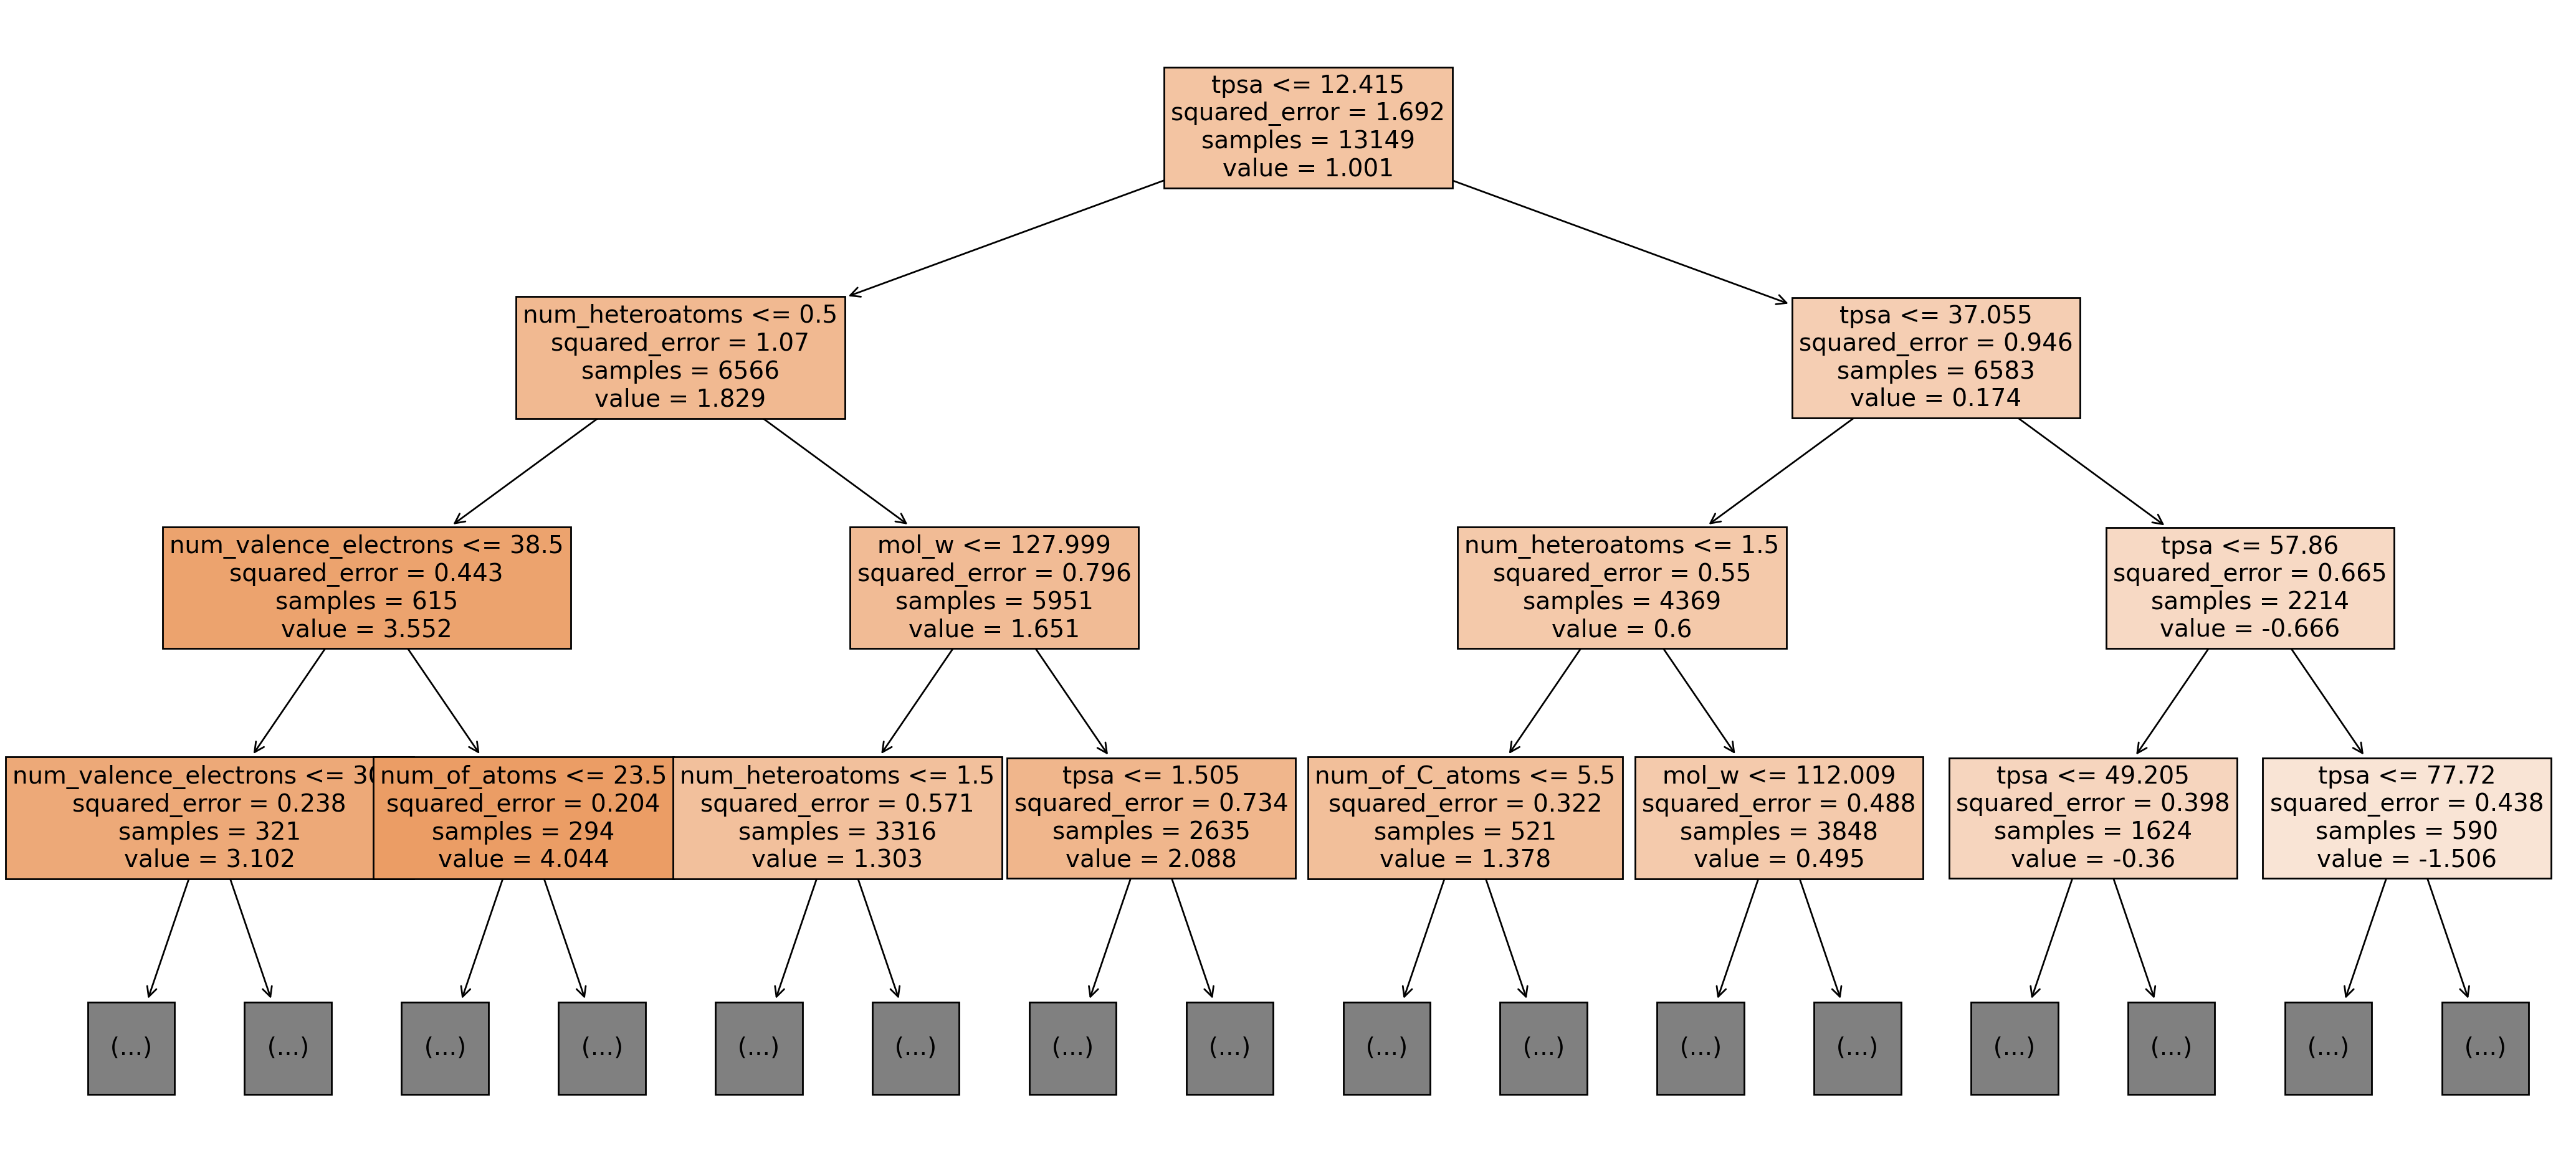

In [32]:
from sklearn import tree
import matplotlib
plt.figure(figsize=(26,12))

tree.plot_tree(dtr, fontsize=14,
              feature_names=train_df.columns,
              filled=True,
              impurity=True,
              max_depth=3)
plt.show()

# Fingerprint 표현형 사용

- mol 객체로부터 ECFP Fingerprint를 구하는 함수 정의
- GetMorganFingerprintAsBitVect() 함수를 사용한다

In [33]:
def mol_2_fp(mol):
  fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
  # fp_arr = np.zeros((1, ), dtype=np.int8)
  # DataStructs.ConvertToNumpyArray(fp, fp_arr)
  # return fp_arr
  return fp

- 분자별 Fingerprint 정보를 2차원 어레이로 만들기
- 여러 어레이를 합치기 위해서 np.vstack()을 사용한다

In [34]:
list_fp = df['mol'].apply(mol_2_fp)
ecfp = np.vstack(list_fp)
print(ecfp.shape)
ecfp[:3]

(14610, 1024)


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

- Fingerprint를 사용한 경우의 모델 성능 보기

In [35]:
X_train, X_test, y_train, y_test = train_test_split(ecfp, y, test_size=.1)

## 선형 모델

In [36]:
# 선형모델
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
show_reg_result(y_test, y_pred, 0)

R2: 0.7695
MAE: 0.4815
RMSE: 0.6479
Max error: 3.565


## Light GBM

- 부스팅 방식의 앙상블 모델인 Light GBM 사용하기
- 랜덤 포레스트와 성능이 비슷하며 학습 속도가 빠르다

In [37]:
from lightgbm import LGBMRegressor
lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test, y_pred,0)

R2: 0.8308
MAE: 0.4033
RMSE: 0.5551
Max error: 2.9147


# Scaffold Splitter

- 훈련과 검증 데이터를 나눌때 train_test_split를 사용하여 랜덤하게 나누지 않고 분자의 Scaffold를 고려하여 훈련과 검증 데이터에 유사한 Scaffold가 섞이지 않게 한다
- deepchem이 제공하는 ScaffoldSplitter 함수를 사용하겠다


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-25%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%208.30.54.png?raw=1" width=700>

In [38]:
# Scaffold Splitter를 확인하기 위한 샘플 분자 정의
data_test= ["CC(C)Cl" , "CCC(C)CO" ,  "CCCCCCCO" , "CCCCCCCC(=O)OC" , "c3ccc2nc1ccccc1cc2c3" , "Nc2cccc3nc1ccccc1cc23" , "C1CCCCCC1" ]
Xs = np.zeros(len(data_test))
Ys = np.ones(len(data_test))

# deepchem dataset을 만들고 deepchem이 제공하는 ScaffoldSplitter()를 수행한 결과 보기
dataset = dc.data.DiskDataset.from_numpy(X=Xs,y=Ys,w=np.zeros(len(data_test)),ids=data_test)
scaffoldsplitter = dc.splits.ScaffoldSplitter()
train, test = scaffoldsplitter.train_test_split(dataset)
train, test

(<DiskDataset X.shape: (5,), y.shape: (5,), w.shape: (5,), ids: ['CC(C)Cl' 'CCC(C)CO' 'CCCCCCCO' 'CCCCCCCC(=O)OC' 'C1CCCCCC1'], task_names: [0]>,
 <DiskDataset X.shape: (2,), y.shape: (2,), w.shape: (2,), ids: ['c3ccc2nc1ccccc1cc2c3' 'Nc2cccc3nc1ccccc1cc23'], task_names: [0]>)

- 위의 결과를 보면 훈련과 검증 데이터에 유사한 scafold 샘플이 섞이지 않을 것을 알 수 있다

- 앞의 예제에 Scaffold Splitter를 적용한 경우의 성능 보기

In [39]:
Xs = df[['num_of_atoms', 'num_of_heavy_atoms',
       'num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms',
       'tpsa', 'mol_w', 'num_valence_electrons', 'num_heteroatoms']]
Ys = df['logP']
ids = df['smiles']

In [40]:
dataset = dc.data.DiskDataset.from_numpy(X=Xs,y=Ys,w=np.zeros(len(Xs)),ids=ids)
scaffoldsplitter = dc.splits.ScaffoldSplitter()
train,test = scaffoldsplitter.train_test_split(dataset)

In [41]:
train

<DiskDataset X.shape: (1326, 10), y.shape: (1326,), w.shape: (1326,), task_names: [0]>

In [42]:
test

<DiskDataset X.shape: (13284, 10), y.shape: (13284,), w.shape: (13284,), task_names: [0]>

- 성능 보기
- 랜덤 분할에 비해 성능이 떨어진 것을 알 수 있다

R2: 0.701
MAE: 0.5575
RMSE: 0.7124
Max error: 3.7252


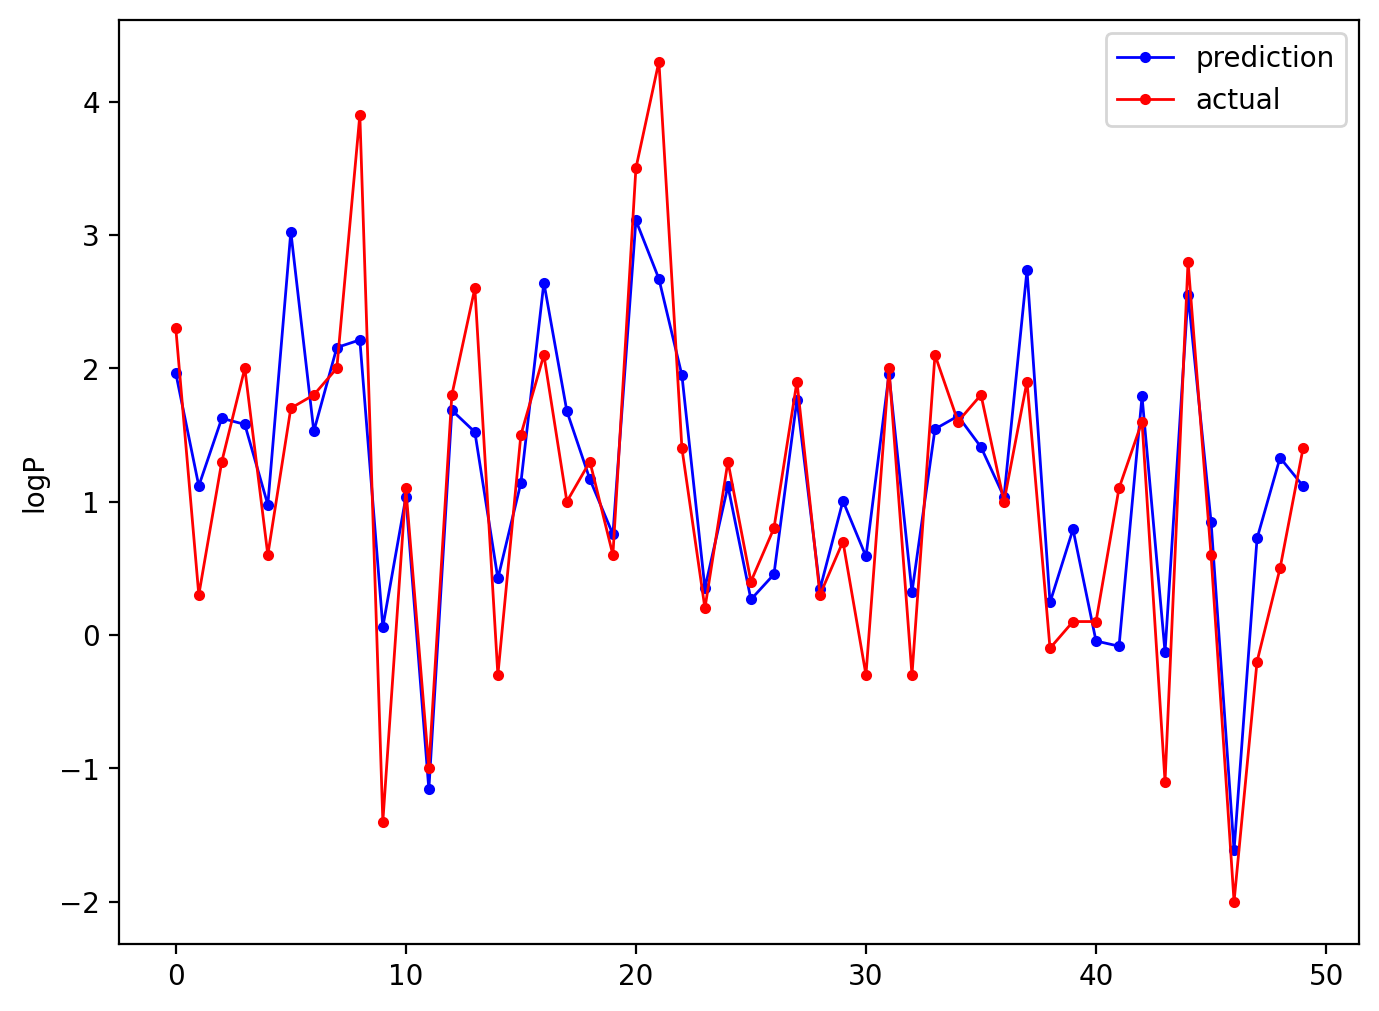

In [43]:
lin.fit(train.X, train.y)
y_pred = lin.predict(test.X)
show_reg_result(test.y, y_pred)